# Gradient Boosting


※ 주요 Ensemble은 bagging과 boosting 계열로 나뉘는데 GB는 booting 계열

- Gradient Boosting learns from the mistake — residual error directly, rather than update the weights of data points.

- GB는 랜덤포레스트처럼 트리를 여러개 만드는 건 동일. but, 단, 한꺼번에 나무를 만들지 않고 나무를 하나 만든 다음 그것의 오차를 줄이는 방법으로 다음 나무를 만들고, 이런 과정을 순차적으로 진행

> - 장점: 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작.
> - 단점: learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 합니다. n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그래디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아짐.




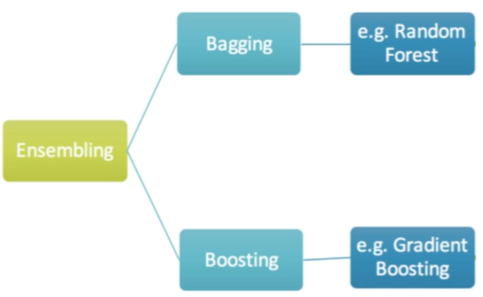

In [ ]:
#import os
#os.chdir(r'C:/Users/User/Desktop')
#os.getcwd()

In [ ]:
from IPython.display import Image

In [ ]:
#Image("img/boosting_example3.png",  width=750, height=750)

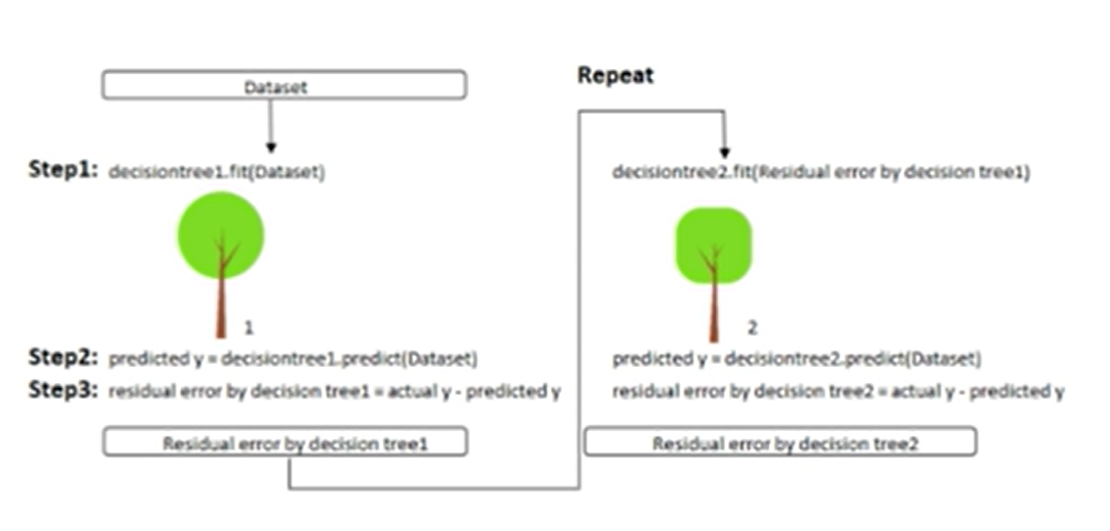

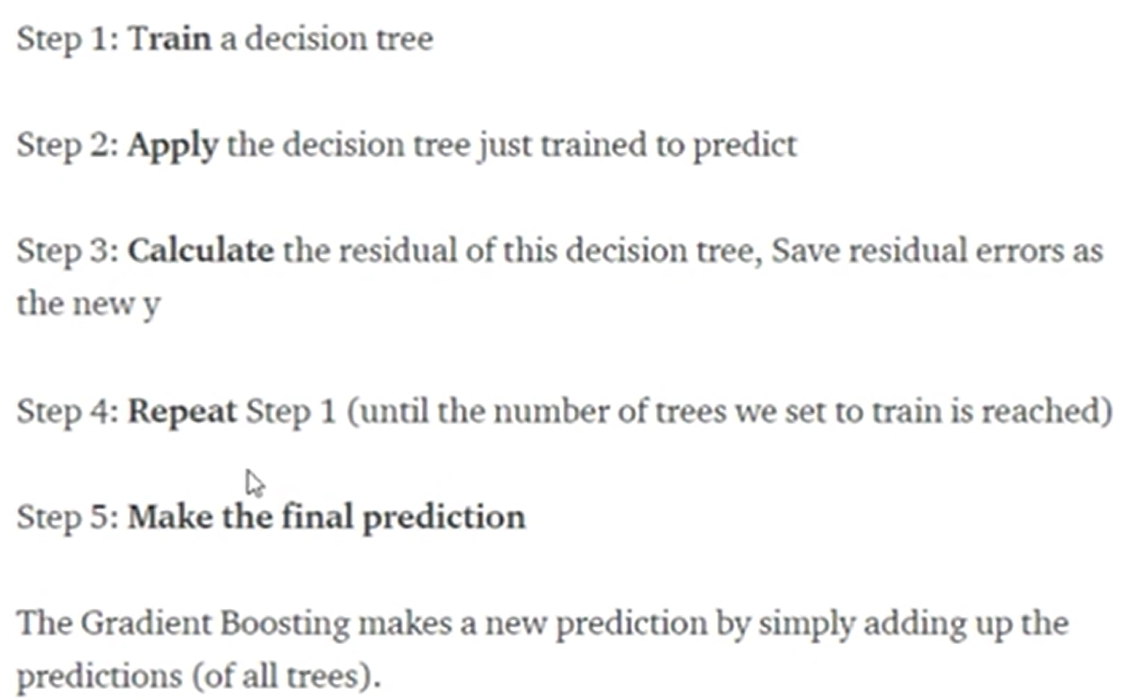

In [ ]:
#Image("img/boosting_example4.png",  width=750, height=750)

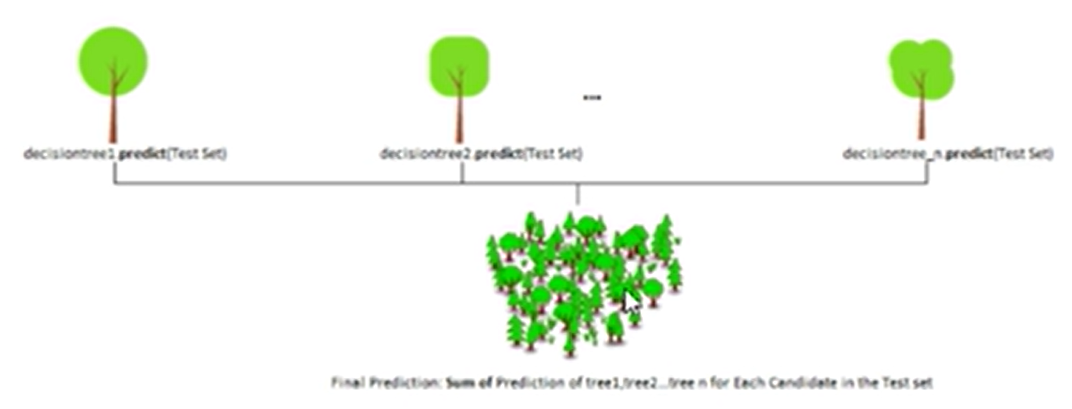

In [2]:
# Basic tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Data split
from sklearn.model_selection import train_test_split

## classification
> Logistic regression 기법을 활용
> 각 확률값을 특정 함수를 통해 residual로 변환하며, 이 residual을 줄여나가는 것이 목표

In [4]:
from sklearn import datasets

# Hastie et al.에서 사용 된 이진 분류에 대한 데이터
# 10 개의 피쳐는 표준 독립적인 가우시안 # default 12000개
X,y = datasets.make_hastie_10_2(n_samples=1000, random_state=42) # 임의로 data set을 생성
print(X.shape)
print(np.unique(y))

(1000, 10)
[-1.  1.]


In [5]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier( n_estimators=100, random_state=42)

gb_clf.fit(X,y)

GradientBoostingClassifier(random_state=42)

In [6]:
# classfication Probability
# 0 -> -1, 1 -> 1로 대응
# -1확률, 1확률
y_prob = gb_clf.predict_proba(X)
y_prob

array([[0.80941407, 0.19058593],
       [0.13695803, 0.86304197],
       [0.74051058, 0.25948942],
       ...,
       [0.2929918 , 0.7070082 ],
       [0.82424053, 0.17575947],
       [0.11335218, 0.88664782]])

In [7]:
y_pred = gb_clf.predict(X)
y_pred

array([-1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1

100
[1.35805147 1.33351466 1.31028351 1.29142766 1.27268687 1.25399852
 1.23449539 1.21636645 1.19889346 1.18190847 1.16710831 1.15111336
 1.13548764 1.12180343 1.1060704  1.09243803 1.07889873 1.06620148
 1.05138648 1.03884838 1.02637169 1.01102649 0.99829839 0.98649075
 0.97497135 0.96369749 0.9531154  0.94164001 0.93100775 0.91985327
 0.91045599 0.90063134 0.89112173 0.88114347 0.87243675 0.86280114
 0.8539259  0.84392584 0.83593789 0.82780024 0.82002488 0.81180618
 0.80308396 0.79458142 0.78740929 0.77936896 0.77164286 0.76478299
 0.75707079 0.74874891 0.7421144  0.7342974  0.72818084 0.72246083
 0.71627904 0.70934206 0.70228027 0.69536299 0.68800331 0.68195164
 0.67721116 0.67184556 0.66564642 0.66021064 0.65254917 0.64691616
 0.64206703 0.63654598 0.63020694 0.62573298 0.61980088 0.61412673
 0.60939116 0.60350242 0.59871853 0.59359116 0.58860561 0.58409314
 0.5783947  0.57411309 0.56826899 0.56332045 0.55903411 0.55439235
 0.55000052 0.5449896  0.54081594 0.53660956 0.53263668 0.

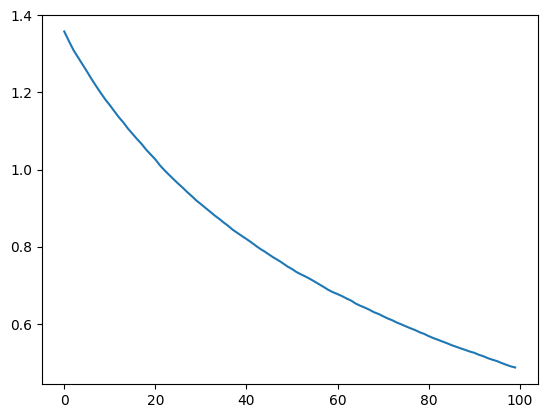

In [8]:
# staged_score 새로운 data에 대해서 누적한 값
# 그 누적값을 학습한 값들을 기록함
print(len(gb_clf.train_score_))
print(gb_clf.train_score_)

# residual이니깐 계속 값이 떨어지는 것임
plt.plot(gb_clf.train_score_)

In [9]:
#train test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Modeling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier(random_state=42)

# n_estimators: tree 갯수, max_features:
param_grid = [{'n_estimators': range(1, 500, 50), 'max_features': range(1, 10),
              'max_depth':  range(3, 5), 'learning_rate': np.linspace(0.01, 0.1, 10)}]

gs = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid=[{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                          'max_depth': range(3, 5),
                          'max_features': range(1, 10),
                          'n_estimators': range(1, 500, 50)}],
             scoring='accuracy', verbose=1)

In [ ]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsb_estimator = gs.best_estimator_
best_gsb_estimator

In [ ]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsb_estimator.n_estimators )
print("max_depth: %d" %best_gsb_estimator.max_depth )
print("Learning Rate: %.3f" %best_gsb_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsb_estimator.min_samples_leaf )
print("max_features: %d" %best_gsb_estimator.max_features)
print("---------------------------" )

In [ ]:
np.linspace(100, 1000, 10)

In [ ]:
best_feature_importances = best_gsb_estimator.feature_importances_
best_feature_importances

### 여러가지 기능

In [ ]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## 피쳐마다 비슷하게 생성되었기 때문에 수치가 비슷하게 생성된 것을 알 수 있음

import seaborn as sns

ft_importances = pd.Series(best_feature_importances)

plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(x=np.linspace(1,10, 10), y=ft_importances)
plt.show()

In [ ]:
params = gs.best_params_
params

### deviance (= loss) of the model at iteration
- model의 deviance(편차)를 반복 횟수에 따라 train과 test의 deviance가 얼마나 줄어드는지 확인

In [ ]:
# train, test deviance graph
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(best_gsb_estimator.staged_predict(X_test)):
    test_score[i] = best_gsb_estimator.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, best_gsb_estimator.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy: %.2f" %best_gsb_estimator.score(X_train,y_train) )
print("Test Accuracy: %.2f" %best_gsb_estimator.score(X_test,y_test) )

In [ ]:
best_gsb_estimator

In [ ]:
# 2d array 형태로 되어있음
best_gsb_estimator.estimators_

In [ ]:
# GB 중 일부 트리 graph화
estimator = best_gsb_estimator.estimators_[450][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator,
                rounded = True, proportion = False,
                precision = 2, filled = True,
                special_characters=True)


graph = graphviz.Source(dot_data)
graph